In [1]:

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Loading the Insurance Dataset

In [2]:
df = pd.read_csv("insurance.csv")
print(f"Shape of dataset {df.shape}")
df.head()

Shape of dataset (1338, 7)


,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='region', ylabel='count'>

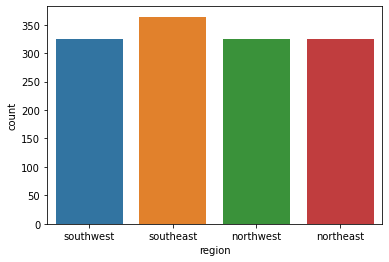

In [4]:
sns.countplot(x='region', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

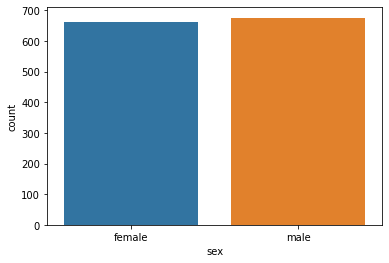

In [5]:
sns.countplot(x='sex', data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

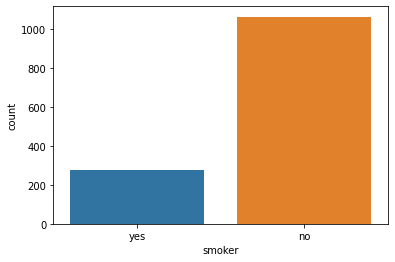

In [6]:
sns.countplot(x='smoker', data=df)

> We have a small fraction of smokers as compare to non-smoker population

<AxesSubplot:xlabel='children', ylabel='count'>

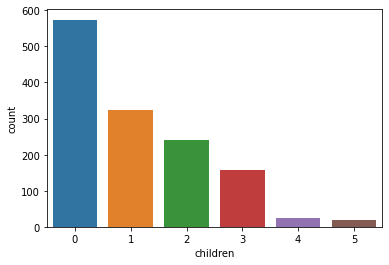

In [8]:
sns.countplot(x='children', data=df)


> A large portion of patients record have no children covered by the health insurance.

Text(0.5, 1.0, 'Smoking Regions')

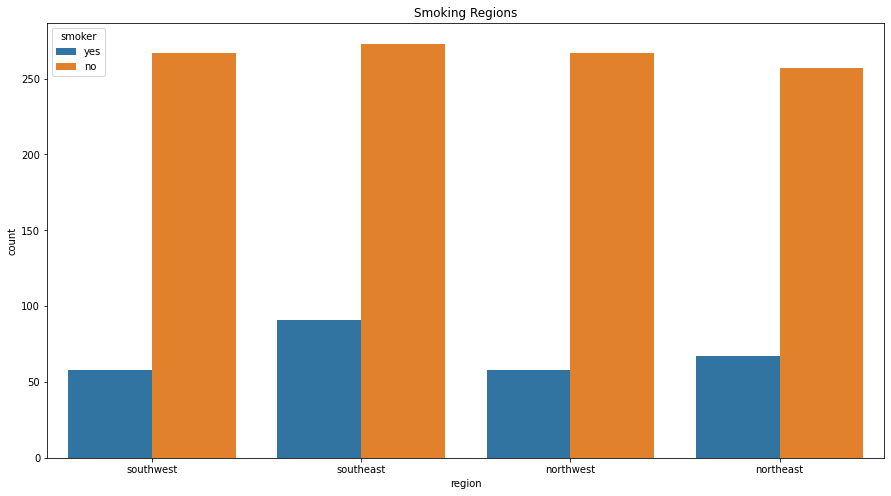

In [11]:
plt.figure(figsize = (15,8))
sns.countplot(x="region", hue="smoker", data=df).set_title("Smoking Regions")


> The bar chart visualize "southeast" region as the one with most number of smokers and non-smokers as well, whereas 
> "northeast" has less number of smokers as compare to other regions!

### Determining correlation between each predictor and the medicalCost.

In [13]:
df.corr()

,age,bmi,children,medicalCost
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
medicalCost,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

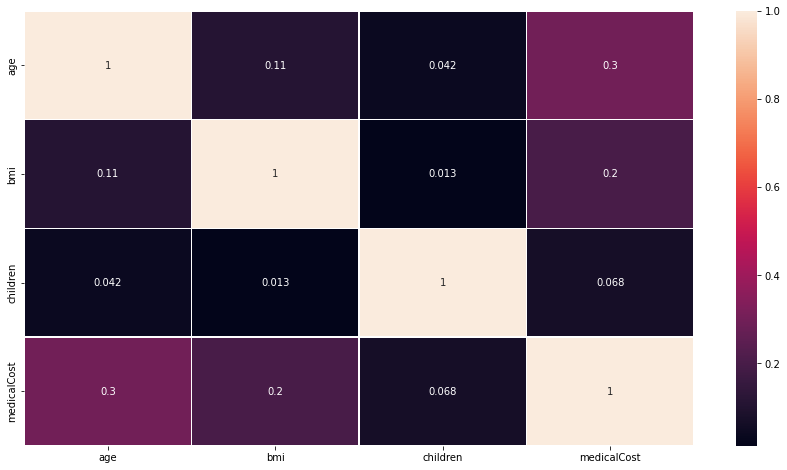

In [14]:
### Plotting Heat Map of the correlation between the values. It gives more neat and clear understanding #####
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),vmax=1, annot=True, linewidths=.5)

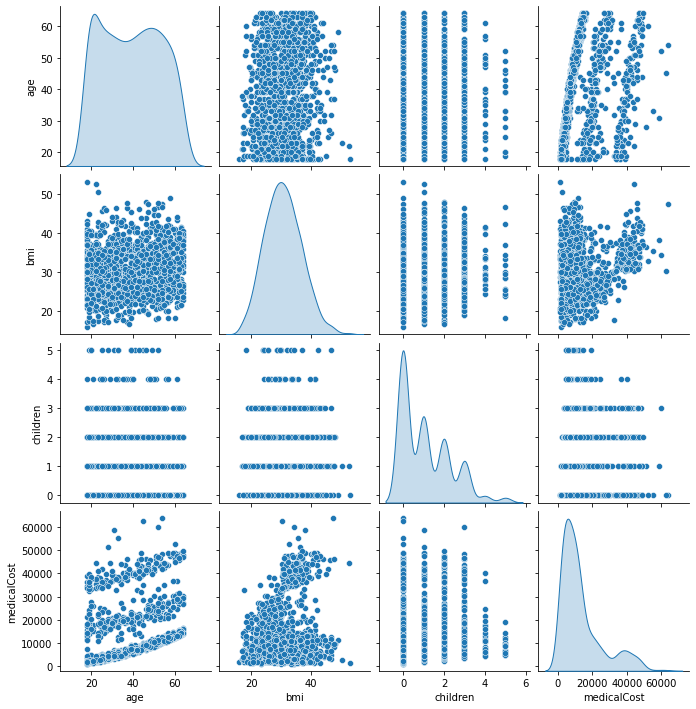

In [15]:
sns.color_palette("dark")

sns.pairplot(data=df, diag_kind='kde')



#### The following key facts are revealed by the data's statistical representation:
> Correlation between Medicalcost and children values is very weak
>> This indicates that the number of children covered by an individual's insurance has little to no effect on their medical costs, suggesting that children do not substantially impact the overall healthcare expenses in this dataset.

> Age shows a positive correlation with medicalCost:
>> A positive correlation exists between age and medical costs, suggesting that older individuals tend to have higher medical expenses. This aligns with common healthcare trends, where medical costs generally increase with age due to the higher prevalence of health conditions

> BMI has a normal distribution:
>> The bmi (Body Mass Index) feature appears to follow a normal distribution, indicating that most individuals in the dataset have a BMI value close to the mean, with fewer individuals falling into the extremes of very low or very high BMI categories.

<AxesSubplot:xlabel='region', ylabel='medicalCost'>

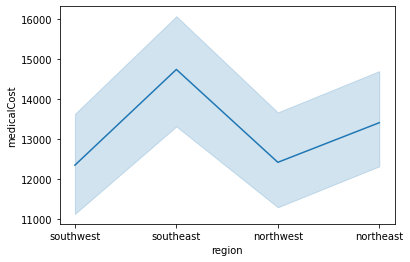

In [16]:
sns.lineplot(x="region", y="medicalCost", data=df)

> In contrast to other regions, the "southwest" has the lowest medical costs, while the "southeast" has some of the highest!

<AxesSubplot:xlabel='smoker', ylabel='medicalCost'>

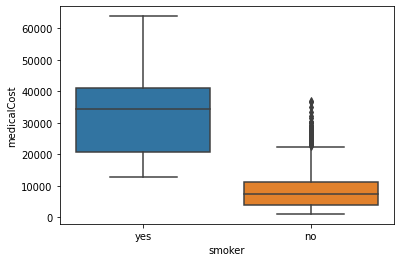

In [17]:
sns.boxplot(x="smoker", y="medicalCost", data=df)

> The plot illustrates how "smokers" incur higher medical costs than non-smokers.

<AxesSubplot:xlabel='sex', ylabel='medicalCost'>

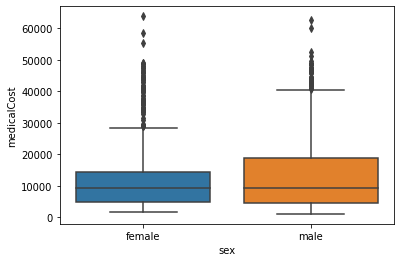

In [22]:
sns.boxplot(x="sex", y="medicalCost", data=df)

<AxesSubplot:xlabel='children', ylabel='medicalCost'>

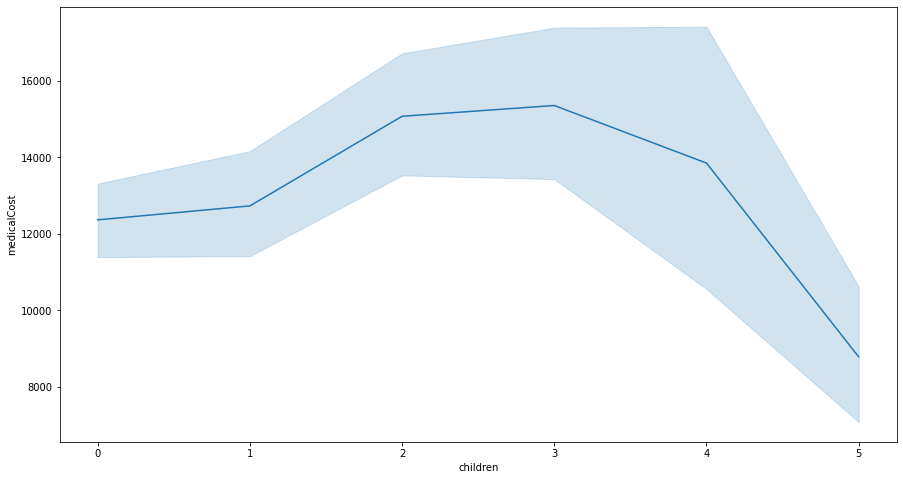

In [23]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df, x="children", y="medicalCost")

> The peak in the plot suggests that individuals with 2-3 children incur the highest medical costs. This could reflect increased healthcare needs for these family sizes. 

In [18]:
# Converting categorical data into numerical data
df_num = pd.get_dummies(df)

In [19]:
df_num

,age,bmi,children,medicalCost,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


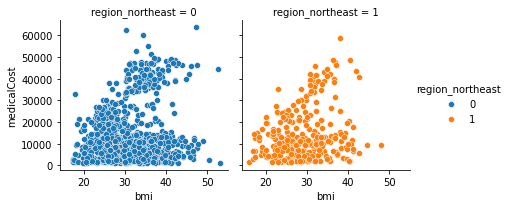

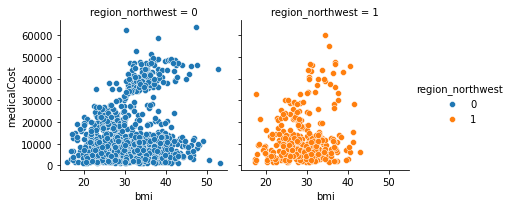

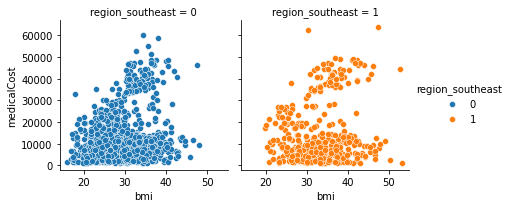

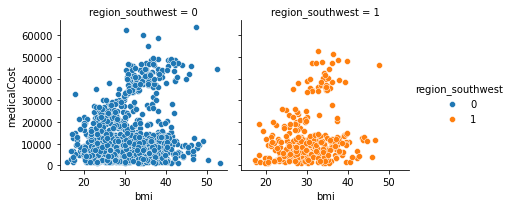

In [20]:
regions = ["region_northeast","region_northwest","region_southeast","region_southwest"]
for region in regions:
    gridlayout = sns.FacetGrid(df_num, col = region, hue = region, col_wrap=2)
    gridlayout.map(sns.scatterplot, "bmi", "medicalCost")

    gridlayout.add_legend()

In [21]:
df_num.corr()

,age,bmi,children,medicalCost,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
medicalCost,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


# Considering the best 3 predictors: smokers, age, bmi and Building a Regression Model

In [25]:
region=pd.get_dummies(df.region, prefix='region')
df = pd.concat([df,region],axis=1)
df.drop(columns='region', inplace=True)

df.sex.replace(to_replace=['male','female'],value=[1,0], inplace=True)
df.smoker.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)

In [26]:
df

,age,sex,bmi,children,smoker,medicalCost,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [28]:
df

,age,sex,bmi,children,smoker,medicalCost,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


#### Normalizing the dataframe

In [30]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled,columns=[
  'age', 'sex', 'bmi', 'children','smoker', 'medicalCost', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'])


In [31]:
df1

,age,sex,bmi,children,smoker,medicalCost,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.043816,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.151299,0.0,1.0,0.0,0.0
1334,0.000000,0.0,0.429379,0.0,0.0,0.017305,1.0,0.0,0.0,0.0
1335,0.000000,0.0,0.562012,0.0,0.0,0.008108,0.0,0.0,1.0,0.0
1336,0.065217,0.0,0.264730,0.0,0.0,0.014144,0.0,0.0,0.0,1.0


#### Linear Model for Age predictor

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['age'].values.reshape((-1,1)), df1['medicalCost'], test_size = 0.20,random_state = 2)

In [33]:
linear_model1 = LinearRegression()
linear_model1.fit(x_train,y_train)
r_sq = linear_model1.score(x_test,y_test)
print(f"Coefficient of determination : {r_sq}")
print(f"Intercept : {linear_model1.intercept_}")
print(f"Slope : {linear_model1.coef_}")    

Coefficient of determination : 0.11469229855003893
Intercept : 0.1097193332010889
Slope : [0.18373089]


In [34]:
y_pred = linear_model1.predict(x_test)
print(f"Predicted Response : \n{y_pred}")

Predicted Response : 
[0.12969008 0.25750288 0.23753213 0.10971933 0.21356723 0.19359648
 0.13368423 0.10971933 0.28945608 0.19359648 0.26948533 0.10971933
 0.19759063 0.10971933 0.22954383 0.27347948 0.15764913 0.16164328
 0.17362573 0.10971933 0.26549118 0.12170178 0.18560818 0.19759063
 0.12569593 0.26149703 0.13767838 0.22155553 0.14566668 0.14167253
 0.18960233 0.14566668 0.16164328 0.16164328 0.20957308 0.10971933
 0.10971933 0.18560818 0.13368423 0.28546193 0.11371348 0.13368423
 0.21356723 0.12170178 0.20158478 0.16963158 0.23353798 0.15365498
 0.15764913 0.25750288 0.11770763 0.11371348 0.11371348 0.26149703
 0.19759063 0.25350873 0.13368423 0.20557893 0.12569593 0.20158478
 0.28945608 0.12170178 0.13368423 0.20957308 0.11371348 0.26948533
 0.27347948 0.11770763 0.28546193 0.20557893 0.25750288 0.28146778
 0.23753213 0.18960233 0.27747363 0.24152628 0.12170178 0.12170178
 0.14566668 0.27347948 0.25750288 0.24152628 0.10971933 0.12170178
 0.25750288 0.15365498 0.28146778 0.2774

In [35]:
predictions_train = linear_model1.predict(x_train)

In [36]:
# Calculate the root mean square error (RMSE) for test and training data
from sklearn.metrics import mean_squared_error
rmse_test = math.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE TEST: ", rmse_test)     # 0.1840

rmse_train = math.sqrt(mean_squared_error(y_train,predictions_train))
print("RMSE train: ", rmse_train) #0.1844



RMSE TEST:  0.18405313548551128
RMSE train:  0.18448269798590433


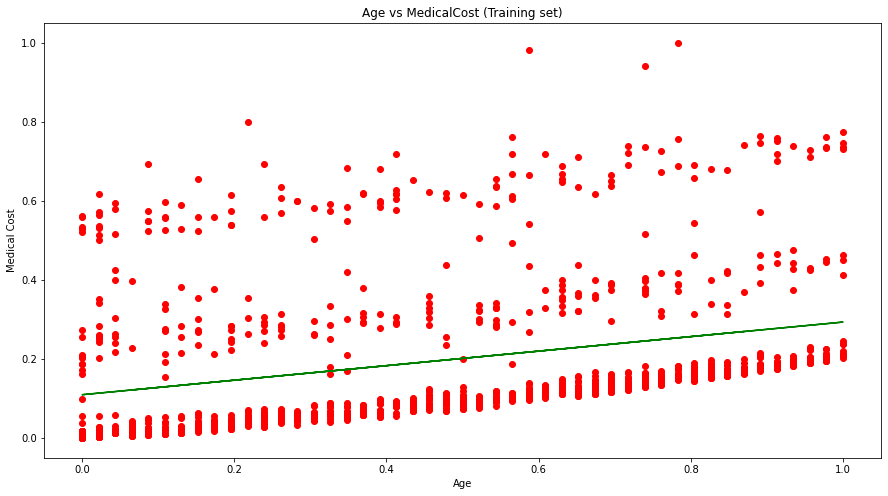

In [37]:
plt.figure(figsize = (15,8))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, linear_model1.predict(x_train), color = "green")
plt.title("Age vs MedicalCost (Training set)")
plt.xlabel("Age")
plt.ylabel("Medical Cost")
plt.show()

In [38]:
print("Model Accuracy for (Age vs MedicalCost): ",r_sq*100,'%')

Model Accuracy for (Age vs MedicalCost):  11.469229855003892 %


#### Linear Model for "Smoker" Predictor

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['smoker'].values.reshape((-1,1)), df1['medicalCost'], test_size = 0.20,random_state = 2)

linear_model2 = LinearRegression()
linear_model2.fit(x_train,y_train)
r_sq = linear_model2.score(x_test,y_test)
print(f"Coefficient of determination : {r_sq}")
print(f"Intercept : {linear_model1.intercept_}")
print(f"Slope : {linear_model1.coef_}")                    

Coefficient of determination : 0.5873875312183237
Intercept : 0.1097193332010889
Slope : [0.18373089]


In [40]:
y_pred = linear_model2.predict(x_test)
print(f"Predicted Response : \n{y_pred}")

Predicted Response : 
[0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.49641594 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.49641594 0.11817394 0.11817394 0.11817394 0.49641594 0.49641594
 0.49641594 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.49641594 0.11817394 0.49641594 0.11817394 0.11817394 0.49641594
 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.11817394 0.11817394 0.11817394 0.11817394 0.49641594 0.49641594
 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.49641594
 0.11817394 0.11817394 0.11817394 0.49641594 0.11817394 0.11817394
 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394
 0.11817394 0.11817394 0.11817394 0.11817394 0.11817394 0.49641594
 0.11817394 0.11817394 0.49641594 0.1181

In [41]:
predictions_train = linear_model2.predict(x_train)
# Calculate the root mean square error (RMSE) for test and training data

rmse_test = math.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE TEST: ", rmse_test)     # 0.1256

rmse_train = math.sqrt(mean_squared_error(y_train,predictions_train))
print("RMSE train: ", rmse_train) #0.1174



RMSE TEST:  0.12565138302814852
RMSE train:  0.11748350141998135


> There is some overfitting in the model, but it is not overly severe and may even be trivial, as evidenced by the RMSE value for test being somewhat higher than the training value.

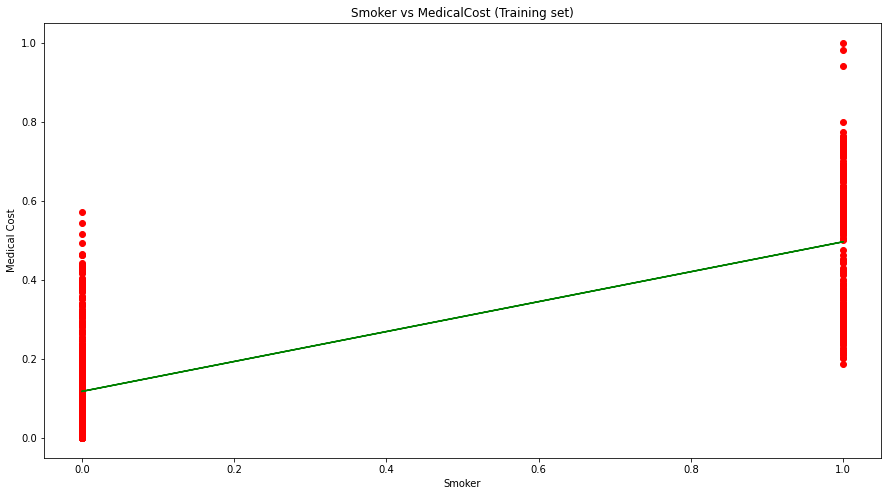

In [42]:
plt.figure(figsize = (15,8))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, linear_model2.predict(x_train), color = "green")
plt.title("Smoker vs MedicalCost (Training set)")
plt.xlabel("Smoker")
plt.ylabel("Medical Cost")
plt.show()

In [43]:
print("Model Accuracy for (Smoker vs MedicalCost): ",r_sq*100,'%')

Model Accuracy for (Smoker vs MedicalCost):  58.73875312183237 %


### Conclusion
> The model for the predictor "Smoker" is the best one among the two because of higher accuracy and the least RMSE. The correlation between the smoker and the medicalcost column is relatively higher so it means that these two columns have strong influence on each other. We came across a little bit overfitting but that can be negligible while considering our prediction variable range!

### Multiple linear regression model with age,bmi, smoker

In [45]:
X = df1[['age', 'bmi','smoker']]
y = df1[['medicalCost']]

In [46]:
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [47]:
multi_regr = LinearRegression().fit(x_train, y_train)

In [48]:
#Prediction of test set
y_pred = multi_regr.predict(x_test)
print("Prediction for test set: {}".format(y_pred))



Prediction for test set: [[ 0.06696907]
 [ 0.05686356]
 [ 0.12423734]
 [ 0.04126829]
 [ 0.38771674]
 [ 0.58688363]
 [ 0.22326085]
 [ 0.01979841]
 [ 0.4550008 ]
 [ 0.24329287]
 [ 0.22591622]
 [ 0.06557387]
 [ 0.15815053]
 [ 0.05821609]
 [ 0.13987043]
 [ 0.49184118]
 [ 0.18206817]
 [ 0.16417821]
 [ 0.09951434]
 [ 0.27869759]
 [ 0.21782301]
 [ 0.04382337]
 [ 0.10027747]
 [ 0.48524433]
 [ 0.19391901]
 [ 0.49989437]
 [ 0.09246357]
 [ 0.61732862]
 [ 0.48984075]
 [ 0.20950767]
 [ 0.24331267]
 [ 0.02926703]
 [ 0.61069307]
 [ 0.41712545]
 [ 0.11767348]
 [ 0.17661976]
 [ 0.11603549]
 [ 0.50744085]
 [ 0.05605159]
 [ 0.58832369]
 [ 0.11595983]
 [ 0.17727162]
 [ 0.08032991]
 [ 0.11033549]
 [ 0.00430431]
 [ 0.07996   ]
 [ 0.08287179]
 [ 0.04546313]
 [ 0.01879555]
 [ 0.16689208]
 [ 0.26549642]
 [ 0.11918128]
 [ 0.03523401]
 [ 0.10907752]
 [ 0.1053762 ]
 [ 0.2108668 ]
 [ 0.19970213]
 [ 0.48403255]
 [ 0.10920068]
 [ 0.19413453]
 [ 0.03319487]
 [ 0.04485305]
 [ 0.07106098]
 [ 0.15655344]
 [ 0.19808261]


In [49]:
# Model evaluation goes here
from sklearn import metrics

meanAbsErr = metrics.mean_absolute_error(y_test, y_pred)
meanSquErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSquErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(multi_regr.score(X,y)*100))
print('Mean Absolute Error:', meanAbsErr)
print('Mean Square Error:', meanSquErr)
print('Root Mean Square Error:', rootMeanSquErr)

R squared: 74.69
Mean Absolute Error: 0.06280986771085359
Mean Square Error: 0.008220991196214819
Root Mean Square Error: 0.09066968179173686


> The coefficient of determination or R^2 gives us percentage variation in y explained by x-variables or in other words it tells us how many points fall on the regression line. The value of 74.69 indicates that only 74.69% of the data fits on the regression line which means over model fits very well.

> The mean absolute error is the difference between the true values and the predicted values. The lower the value, the better is the performance of model. In our case, its about 0.06 which is pretty good.

> The average of the square of the difference between the data's original and anticipated values is used to calculate mean square error. For our case its 0.008 which very good value to demonstrate model performance

#### Using All the Predictors In the Dataset

In [50]:
X = df1[['age', 'bmi','smoker','sex', 'children','region_northeast','region_northwest','region_southeast','region_southwest']]
y = df1[['medicalCost']]
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
multi_regr2 = LinearRegression().fit(x_train, y_train)
#Prediction of test set
y_pred2 = multi_regr2.predict(x_test)

In [51]:
print("Prediction for test set: {}".format(y_pred2))

Prediction for test set: [[ 0.04729939]
 [ 0.05122823]
 [ 0.11673389]
 [ 0.03179382]
 [ 0.39239088]
 [ 0.59102576]
 [ 0.22834277]
 [ 0.03962497]
 [ 0.45943214]
 [ 0.23693164]
 [ 0.22566109]
 [ 0.06364786]
 [ 0.17099025]
 [ 0.06354913]
 [ 0.12673019]
 [ 0.48730613]
 [ 0.17189389]
 [ 0.18135785]
 [ 0.08661231]
 [ 0.27089697]
 [ 0.2085973 ]
 [ 0.02373874]
 [ 0.09189011]
 [ 0.50444919]
 [ 0.20260205]
 [ 0.51363319]
 [ 0.09840458]
 [ 0.63024126]
 [ 0.49698211]
 [ 0.19899413]
 [ 0.27301766]
 [ 0.03445101]
 [ 0.62369741]
 [ 0.42270206]
 [ 0.11213129]
 [ 0.17545808]
 [ 0.11491869]
 [ 0.52052427]
 [ 0.06057989]
 [ 0.60040132]
 [ 0.10223449]
 [ 0.19128976]
 [ 0.0710195 ]
 [ 0.11643801]
 [ 0.00901758]
 [ 0.06990091]
 [ 0.07260673]
 [ 0.04662616]
 [ 0.03149343]
 [ 0.15846705]
 [ 0.25655237]
 [ 0.09742324]
 [ 0.07830462]
 [ 0.12854288]
 [ 0.0916214 ]
 [ 0.19828193]
 [ 0.18721665]
 [ 0.49713596]
 [ 0.11438239]
 [ 0.18418189]
 [ 0.04167098]
 [ 0.05022   ]
 [ 0.07922147]
 [ 0.14648217]
 [ 0.21087383]


In [52]:
# Part 2- Model evaluation goes here
from sklearn import metrics

meanAbsErr = metrics.mean_absolute_error(y_test, y_pred2)
meanSquErr = metrics.mean_squared_error(y_test, y_pred2)
rootMeanSquErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))

print('R squared: {:.2f}'.format(multi_regr2.score(X,y)*100))
print('Mean Absolute Error:', meanAbsErr)
print('Mean Square Error:', meanSquErr)
print('Root Mean Square Error:', rootMeanSquErr)

R squared: 74.96
Mean Absolute Error: 0.06294219810761574
Mean Square Error: 0.008241234233903773
Root Mean Square Error: 0.09078124384422023


> The co-efficient of determination or R*2 here gives us value of 74.96 which is slightly a bit better then our first multi-regression model. Also the mean absolute and mean sqaure error values are very close to zero which is supporting the fact of getting more model performance. 

#### Fact 
> The model accuracy for our first model is 74.69 percent with the best three predictors we have chosen so adding new predictors for the model in our second use case has not improved our results any much. So the extra paramerters i,e regions, sex, children have not added any efficiency in our model. Removing the best three predictors from our model will skew the model performance and the model performance percentage will be in single digit values which is not suitable at all.

### Overall Conclusion

> In conclusion, it has been found that correlation is a key aspect in determining whether the desired output and the individual values are relevant, and in this case, age is a key factor along with smoking values. A crucial component of a model's operation is feature encoding, which is utilised to transform categorical input into numerical data. The values between 0 and 1 are standardised using the feature scaling approach so that they all fall on the same scale and don't overpower the other. The model performed admirably with the top three predictors, but its effectiveness was appalling with the other predictors. We have observed that the model performance was already skewed by just incorporating the irrelevant factors.